In [2]:
# Tratamiento de datos
# ==============================================================================
import cv2
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [10]:
file_name = '185_B4_NORM_ndpi_ROI_mpp0_44_reg000_crop_sk00000_17632,46488,1812.png'
img = cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

Text(0, 0.5, 'Intra-cluster (intertia)')

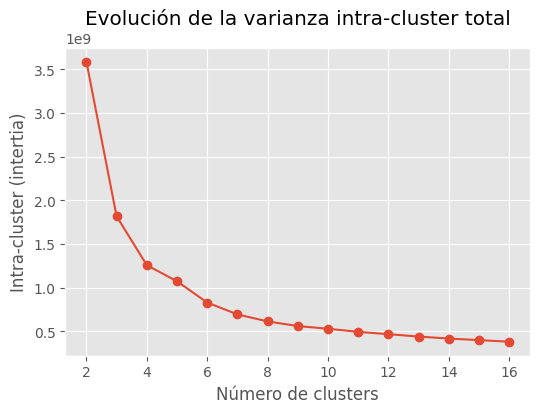

In [12]:
range_n_clusters = range(2, 17)
inertias = []
X = img.reshape(-1, 3)

for K in range_n_clusters:
    kmeans = kmeans = KMeans(n_clusters = K, init = 'k-means++', n_init = 1, max_iter = 100, tol = 1.0e-4, random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Intra-cluster (intertia)')

In [14]:
range_n_clusters = range(2, 13)
valores_medios_silhouette = []
X = img.reshape(-1, 3)

for K in range_n_clusters:
    print(f"K={K}")
    kmeans = kmeans = KMeans(n_clusters = K, init = 'k-means++', n_init = 1, max_iter = 100, tol = 1.0e-4, random_state = 42)
    print("Predict")
    cluster_labels = kmeans.fit_predict(X)
    print("Calulando Silhouette AVG")
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

K=2
Predict
Calulando Silhouette AVG


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');